# Binary Optimization via Stochastic Learning

In [1]:
from pyoed.optimization.binary_optimization import BinaryReinforceOptimizer
from pyoed.optimization.optimization_utils import pseudo_random_binary_objective_function
import matplotlib.pyplot as plt

In [2]:
def show_optimization_results(results):
    """Define a local function to plot optimization results given the ouput of optimizer `solve` method"""
    # Show the Optimal Solution/Design
    print(
        f"Optimal Design: {results['optimal_design']}\n"
        f"Optimal Objective Value: {results['optimal_design_objval']}"
    )
    
    # More details: show the Optimal policy (sampling probabilities)
    
    print(
        f"Optimal Plicy: {results['optimal_policy']}"
    )
    
    for i in range(len(results['optimal_policy_sample'])):
        print(
            f"Design Sample [{i+1}]: {results['optimal_policy_sample'][i]}; "
            f" Objective = {results['optimal_policy_sample_objval'][i]}\n"
        )
    
    # Plot optimization trajectory
    plt.plot(results['optimization_trajectory_stoch_objval'])
    plt.xlabel('Optimization Iteration')
    plt.ylabel('Objective')

## Maximization problem

In [3]:
# Create the optimizer & solve maximization problem (for a pseudo random function of binary variable)

# Size of the binary variable
problem_dimension = 10

# Create the optimizer
optimizer = BinaryReinforceOptimizer(
    configs=dict(
        obj_fun = lambda x: pseudo_random_binary_objective_function(x)- abs(sum(x)-len(x)//2),
        size=problem_dimension,
        maximize=True,
        def_stepsize=0.01,
        decay_step=False,
        baseline='optimal',
        optimal_baseline_batch_size=32,
        optimal_baseline_epochs=1,
        maxiter=200,
    )
)

In [4]:
# Solve 
maximization_results = optimizer.solve()

REINFORCE Iteration: 1 ; Step-Update-Norm: 0.035418111157288094 
REINFORCE Iteration: 2 ; Step-Update-Norm: 0.018882582890274925 
REINFORCE Iteration: 3 ; Step-Update-Norm: 0.023726450312486633 
REINFORCE Iteration: 4 ; Step-Update-Norm: 0.041538589582830285 
REINFORCE Iteration: 5 ; Step-Update-Norm: 0.03700612546669271 
REINFORCE Iteration: 6 ; Step-Update-Norm: 0.029258110020401542 
REINFORCE Iteration: 7 ; Step-Update-Norm: 0.03464558276560246 
REINFORCE Iteration: 8 ; Step-Update-Norm: 0.04723128033662414 
REINFORCE Iteration: 9 ; Step-Update-Norm: 0.02451879302243839 
REINFORCE Iteration: 10 ; Step-Update-Norm: 0.04178987279451244 
REINFORCE Iteration: 11 ; Step-Update-Norm: 0.021764512443685553 
REINFORCE Iteration: 12 ; Step-Update-Norm: 0.03437763820354311 
REINFORCE Iteration: 13 ; Step-Update-Norm: 0.022612846010069017 
REINFORCE Iteration: 14 ; Step-Update-Norm: 0.03826179103295061 
REINFORCE Iteration: 15 ; Step-Update-Norm: 0.021692870105916848 
REINFORCE Iteration: 16 ; 

Optimal Design: [False False False  True  True False False  True  True  True]
Optimal Objective Value: 9.88928885597721
Optimal Plicy: [0.         0.         0.         1.         1.         0.
 0.         1.         1.         0.94905064]
Design Sample [1]: [False False False  True  True False False  True  True  True];  Objective = 9.88928885597721

Design Sample [2]: [False False False  True  True False False  True  True  True];  Objective = 9.88928885597721

Design Sample [3]: [False False False  True  True False False  True  True  True];  Objective = 9.88928885597721

Design Sample [4]: [False False False  True  True False False  True  True  True];  Objective = 9.88928885597721

Design Sample [5]: [False False False  True  True False False  True  True  True];  Objective = 9.88928885597721



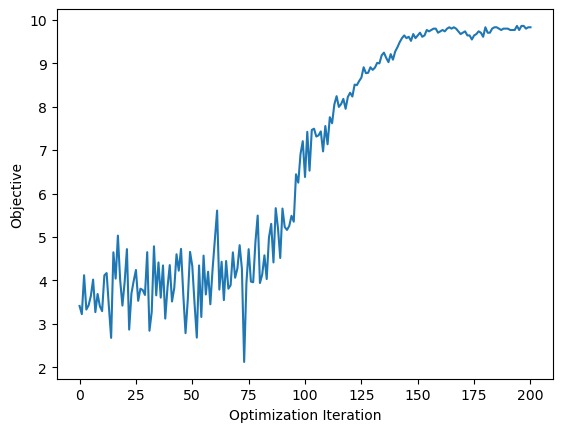

In [5]:
# Plot 
show_optimization_results(maximization_results)

Plots saved...


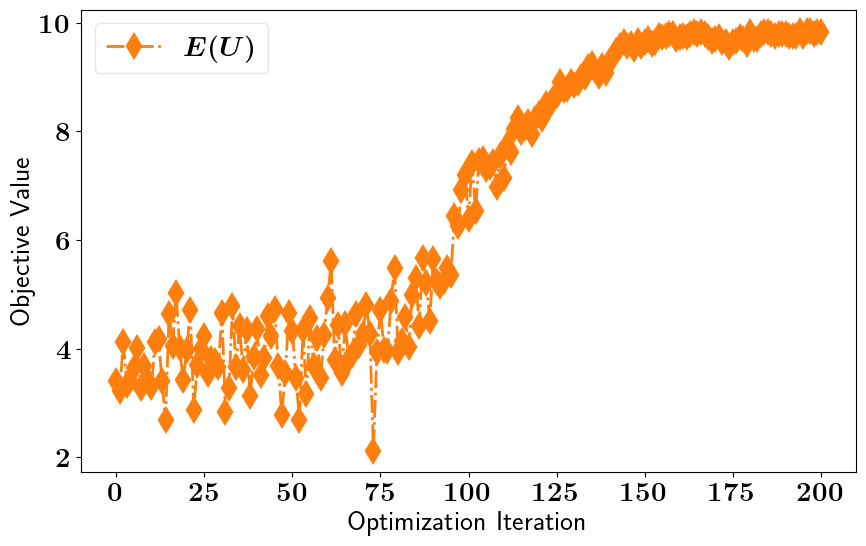

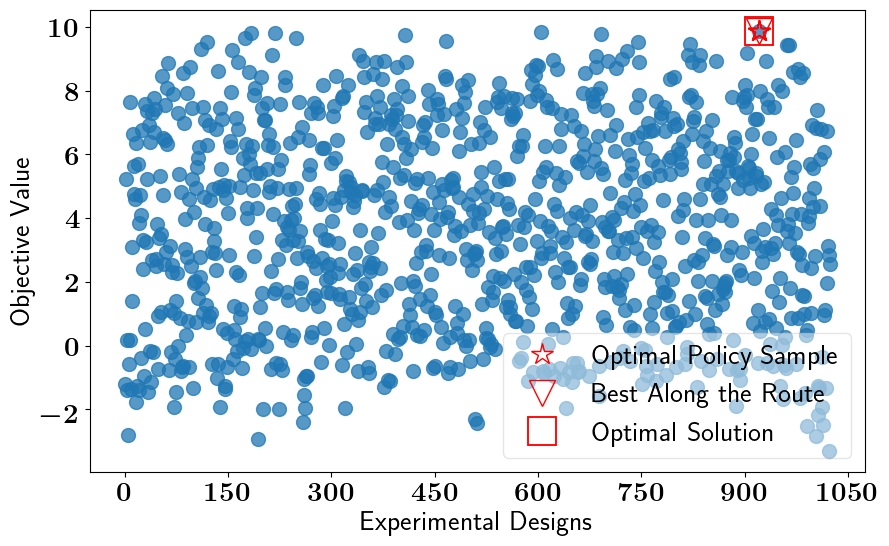

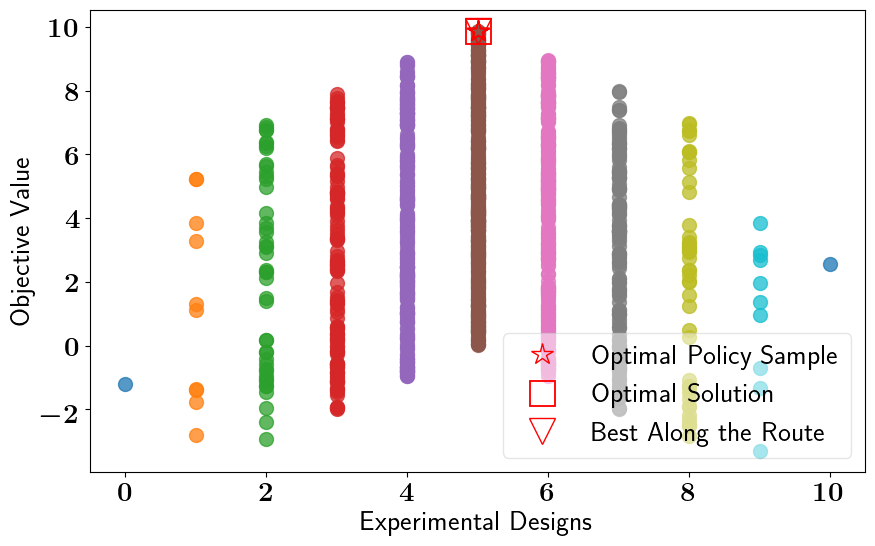

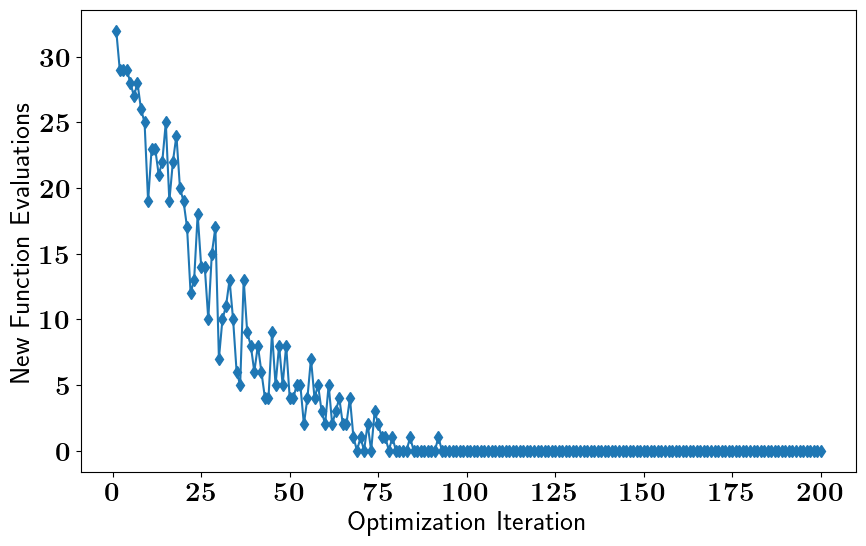

In [6]:
# Use optimizer plotter for visualization
optimizer.plot_results(maximization_results, bruteforce=True, overwrite=True, keep_plots=True, )

## Minimization problem
You can either recreate the optimizer with configuration `maximize` set to `False`, or simply update this configuration as follows

/Users/attia/AHMED_HOME/Research/Projects/Software/PyOED/Forks/pyoed-oed.dev/pyoed/optimization/binary_optimization/stochastic_binary_optimization.py:813: UserWarning: The best_along_the_route dictionary will not be built as the objective value tracker is populated beforehand.
 It must be initially empty (before starting the solution process) in order to find the best solution that has been explored so far.
  warnings.warn(


REINFORCE Iteration: 1 ; Step-Update-Norm: 0.03272102244851443 
REINFORCE Iteration: 2 ; Step-Update-Norm: 0.02332812233420928 
REINFORCE Iteration: 3 ; Step-Update-Norm: 0.035478689070444124 
REINFORCE Iteration: 4 ; Step-Update-Norm: 0.04160169653475992 
REINFORCE Iteration: 5 ; Step-Update-Norm: 0.03568820023437032 
REINFORCE Iteration: 6 ; Step-Update-Norm: 0.03934009996250111 
REINFORCE Iteration: 7 ; Step-Update-Norm: 0.025118571696157097 
REINFORCE Iteration: 8 ; Step-Update-Norm: 0.03750218328219725 
REINFORCE Iteration: 9 ; Step-Update-Norm: 0.03721899220803475 
REINFORCE Iteration: 10 ; Step-Update-Norm: 0.043522247546449434 
REINFORCE Iteration: 11 ; Step-Update-Norm: 0.02173080137596666 
REINFORCE Iteration: 12 ; Step-Update-Norm: 0.03028557873038286 
REINFORCE Iteration: 13 ; Step-Update-Norm: 0.05332750767185668 
REINFORCE Iteration: 14 ; Step-Update-Norm: 0.03317418536963598 
REINFORCE Iteration: 15 ; Step-Update-Norm: 0.04522855996270877 
REINFORCE Iteration: 16 ; Step-

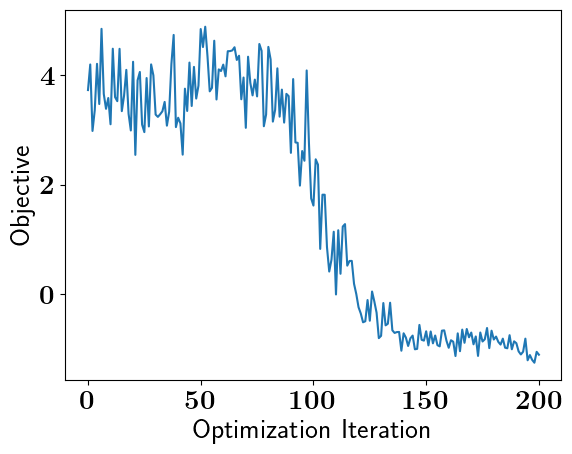

In [7]:
# Set the optimization objective to minimization
optimizer.update_configurations(maximize=False)

# Solve & Plot
minimization_results = optimizer.solve()
show_optimization_results(minimization_results)

Plots saved...


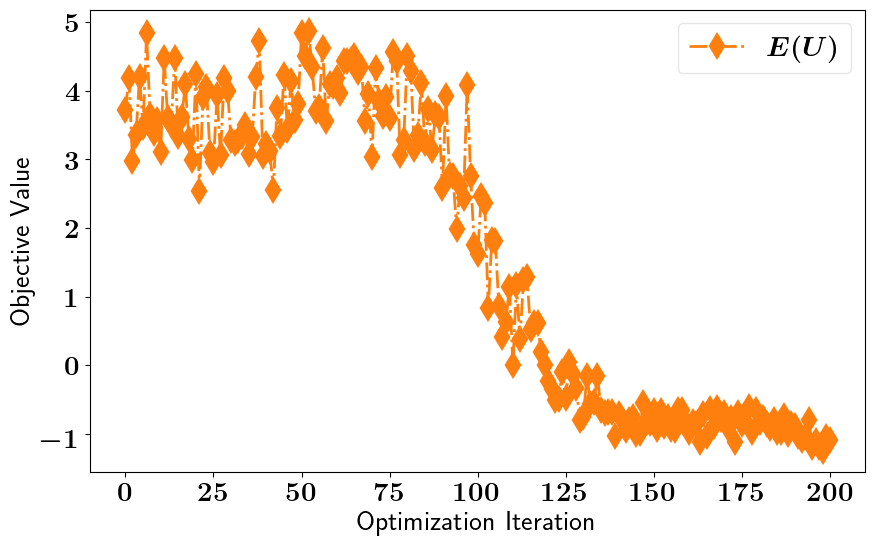

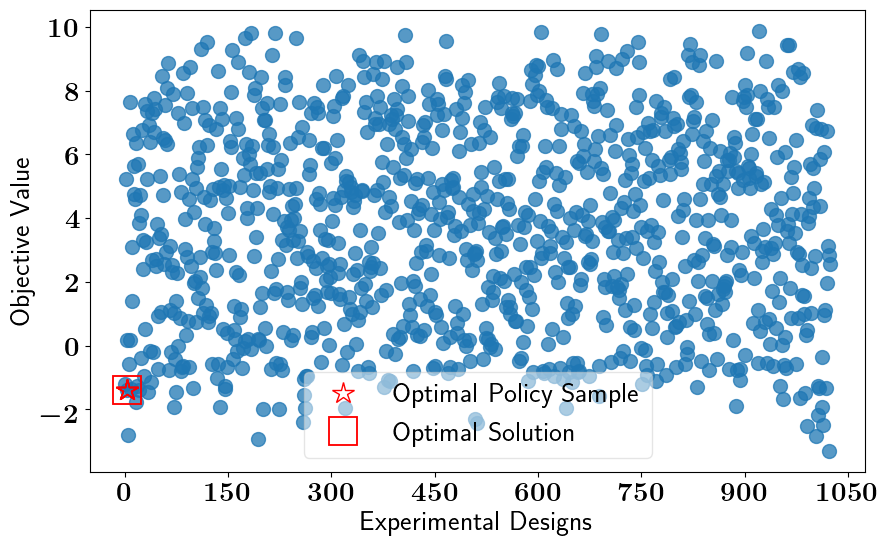

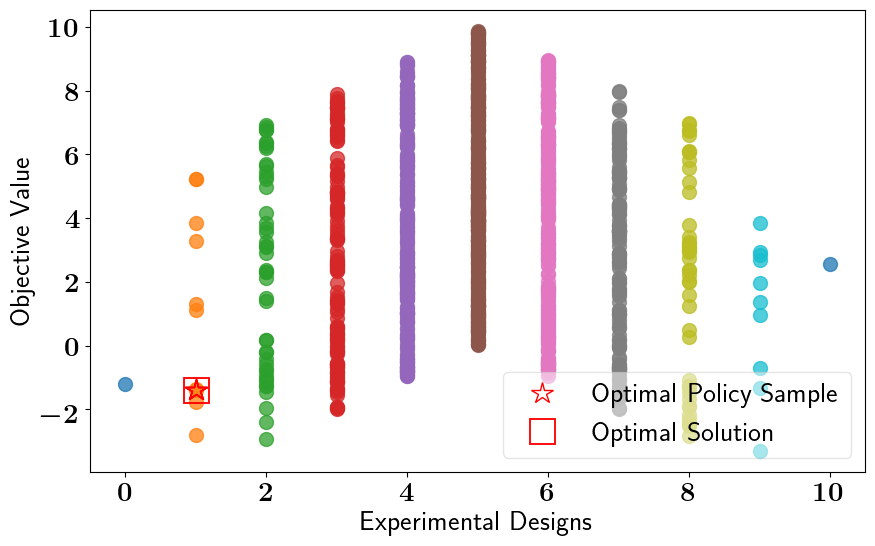

In [8]:
# Use optimizer plotter for visualization
optimizer.plot_results(minimization_results, bruteforce=True, overwrite=True, keep_plots=True, )